# Explore here

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
72,6.3,2.5,4.9,1.5
129,7.2,3.0,5.8,1.6
48,5.3,3.7,1.5,0.2
142,5.8,2.7,5.1,1.9
149,5.9,3.0,5.1,1.8


In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 77)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=77)

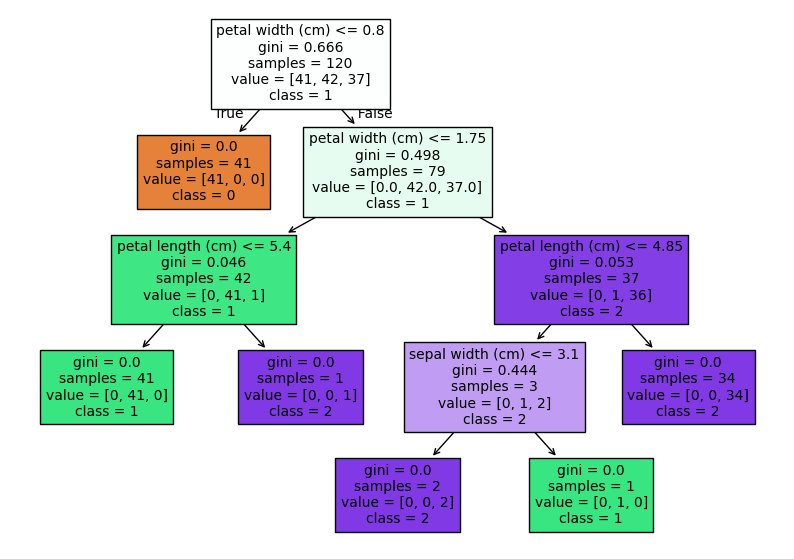

In [68]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,7))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [69]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 2, 1, 0, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 0, 1, 1])

In [70]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9

In [71]:
# Optimización del modelo. 

hyperparams = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0]
}


from sklearn.model_selection import GridSearchCV 

model = DecisionTreeClassifier(random_state = 77)
grid = GridSearchCV(model, hyperparams, scoring = "accuracy")

In [72]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=77),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50, 100],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [73]:

final_model = grid.best_estimator_
final_model

DecisionTreeClassifier(random_state=77)

In [77]:
# Predecimos con el nuevo modelo ya entrenado por los unevos parametros.  

y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

In [75]:
score_train = accuracy_score(y_train, y_pred_train),
score_test = accuracy_score(y_test, y_pred_test)

print(f'Score train: {score_train}')
print(f'Score test: {score_test}')


Score train: (1.0,)
Score test: 0.9


In [76]:
import pickle

with open("/Users/julian/Desktop/vs code/STREAMLIT_Project_26_Julian_Lopez/ML-WEBAPP-USING-STREAMLIT_Project_26_Julian_Lopez/models/Decision_tree_model.sav", "wb") as file:
    pickle.dump(final_model, file)